## Classifying Clapper Rails and King Rails Based on their Kek Calls

This project will analyze acoustic markers derived from audio records of Clapper Rails and King Rails in an attempt to classify the species.  
Original work on this dataset is documented at the Wiley Online Library: https://onlinelibrary.wiley.com/doi/10.1002/ece3.4711

During this analysis we will review the following questions:
 - Can we reproduce the basic findings regarding optimal machine learning models for this classification?
 - Are there improvements that can be made in the outcomes?

https://github.com/carl-schick-ds/rails.git

***
### Setup
Import needed libraries.  Unless otherwise noted, all libraries are available in the baseline conda environment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
rails_df = pd.read_csv('KIRACLRA.csv')
rails_df.head()

,Species,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),IQR BW (Hz),Freq 5% (Hz),Freq 95% (Hz),BW 90% (Hz)
0,CLRA,2601.6,2437.5,2976.6,539.1,1851.6,4031.2,2179.7
1,CLRA,2882.8,2671.9,3234.4,562.5,1992.2,4125.0,2132.8
2,CLRA,1500.0,1593.8,2953.1,1359.4,1500.0,4804.7,3304.7
3,CLRA,2507.8,2507.8,3656.2,1148.4,1664.1,4851.6,3187.5
4,CLRA,2953.1,2765.6,3703.1,937.5,2015.6,4453.1,2437.5


In [4]:
rails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         960 non-null    object 
 1   Peak Freq (Hz)  960 non-null    float64
 2   Q1 Freq (Hz)    960 non-null    float64
 3   Q3 Freq (Hz)    960 non-null    float64
 4   IQR BW (Hz)     960 non-null    float64
 5   Freq 5% (Hz)    960 non-null    float64
 6   Freq 95% (Hz)   960 non-null    float64
 7   BW 90% (Hz)     960 non-null    float64
dtypes: float64(7), object(1)
memory usage: 60.1+ KB


In [5]:
print(rails_df['Species'].value_counts())
rails_df['Species'] = rails_df['Species'].astype('category')
print()
display(rails_df.info())

CLRA    480
KIRA    480
Name: Species, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Species         960 non-null    category
 1   Peak Freq (Hz)  960 non-null    float64 
 2   Q1 Freq (Hz)    960 non-null    float64 
 3   Q3 Freq (Hz)    960 non-null    float64 
 4   IQR BW (Hz)     960 non-null    float64 
 5   Freq 5% (Hz)    960 non-null    float64 
 6   Freq 95% (Hz)   960 non-null    float64 
 7   BW 90% (Hz)     960 non-null    float64 
dtypes: category(1), float64(7)
memory usage: 53.7 KB


None

In [6]:
print("Clapper Rails Descriptive Statistics")
display(rails_df[rails_df['Species'] == 'CLRA'].describe().round(decimals=0).astype(int))
print("King Rails Descriptive Statistics")
display(rails_df[rails_df['Species'] == 'KIRA'].describe().round(decimals=0).astype(int))

Clapper Rails Descriptive Statistics


,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),IQR BW (Hz),Freq 5% (Hz),Freq 95% (Hz),BW 90% (Hz)
count,480,480,480,480,480,480,480
mean,2824,2482,3284,801,1979,4175,2196
std,520,327,403,392,273,563,639
min,1500,1594,2484,70,1500,2883,773
25%,2578,2291,2930,516,1805,3744,1734
50%,2742,2508,3258,773,1922,4312,2250
75%,3053,2648,3498,1008,2180,4664,2771
max,4852,3539,4664,2344,2812,4969,3398


King Rails Descriptive Statistics


,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),IQR BW (Hz),Freq 5% (Hz),Freq 95% (Hz),BW 90% (Hz)
count,480,480,480,480,480,480,480
mean,2808,2556,3254,698,2096,3997,1901
std,476,309,530,467,333,587,683
min,1550,1572,2304,65,1507,2692,581
25%,2541,2433,2885,388,1809,3467,1351
50%,2756,2562,3112,581,2132,4059,1873
75%,2993,2735,3488,861,2347,4457,2455
max,4802,3316,4802,2778,3036,4974,3424


In [7]:
corr = rails_df.corr()
display(corr)

,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),IQR BW (Hz),Freq 5% (Hz),Freq 95% (Hz),BW 90% (Hz)
Peak Freq (Hz),1.000000,0.564438,0.510591,0.138000,0.253712,0.206635,0.061446
Q1 Freq (Hz),0.564438,1.000000,0.450016,-0.248563,0.630123,0.183953,-0.130135
Q3 Freq (Hz),0.510591,0.450016,1.000000,0.753137,0.135469,0.593003,0.447317
IQR BW (Hz),0.138000,-0.248563,0.753137,1.000000,-0.317256,0.507690,0.581049
Freq 5% (Hz),0.253712,0.630123,0.135469,-0.317256,1.000000,-0.068072,-0.515680
Freq 95% (Hz),0.206635,0.183953,0.593003,0.507690,-0.068072,1.000000,0.889897
BW 90% (Hz),0.061446,-0.130135,0.447317,0.581049,-0.515680,0.889897,1.000000


<AxesSubplot:>

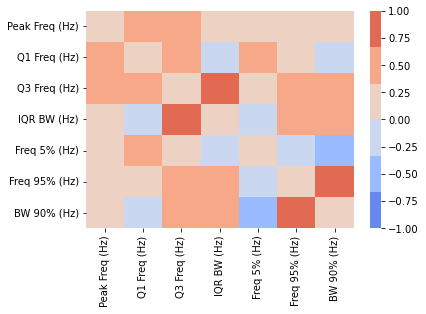

In [8]:
colormap = sns.color_palette("coolwarm")
np.fill_diagonal(corr.values, 0)
vmin, vmax = (-1, 1)
sns.heatmap(corr, center=(vmin + vmax) / 2, vmin=vmin, vmax=vmax, cmap=colormap)

In [9]:
rails_df.drop(['IQR BW (Hz)', 'BW 90% (Hz)'], axis=1, inplace=True)
display(rails_df.head())

,Species,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),Freq 5% (Hz),Freq 95% (Hz)
0,CLRA,2601.6,2437.5,2976.6,1851.6,4031.2
1,CLRA,2882.8,2671.9,3234.4,1992.2,4125.0
2,CLRA,1500.0,1593.8,2953.1,1500.0,4804.7
3,CLRA,2507.8,2507.8,3656.2,1664.1,4851.6
4,CLRA,2953.1,2765.6,3703.1,2015.6,4453.1


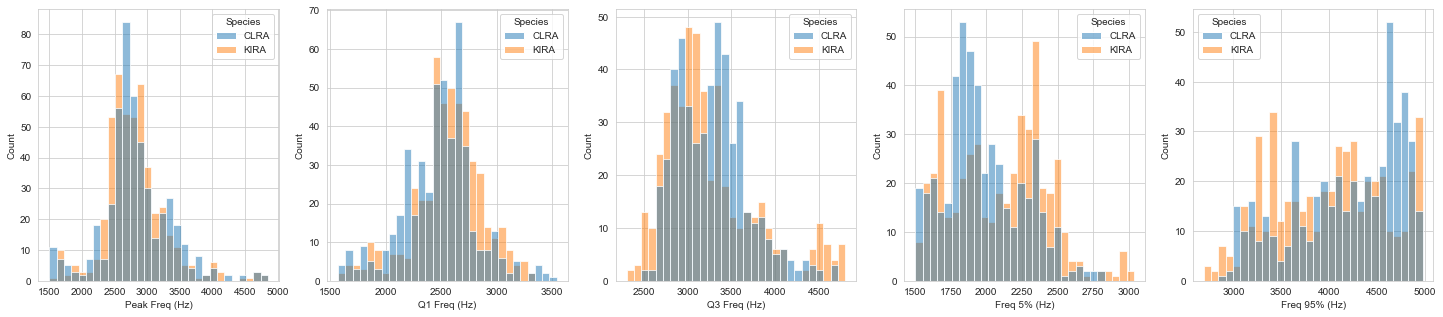

In [25]:
fig, axes = plt.subplots(1,5, figsize=(25,5))
sns.set_style('whitegrid')
sns.histplot(data=rails_df, x='Peak Freq (Hz)', bins = 30, hue='Species', ax=axes[0])
sns.histplot(data=rails_df, x='Q1 Freq (Hz)', bins = 30, hue='Species', ax=axes[1])
sns.histplot(data=rails_df, x='Q3 Freq (Hz)', bins = 30, hue='Species', ax=axes[2])
sns.histplot(data=rails_df, x='Freq 5% (Hz)', bins = 30, hue='Species', ax=axes[3])
sns.histplot(data=rails_df, x='Freq 95% (Hz)', bins = 30, hue='Species', ax=axes[4])
'';

In [27]:
rails_features = rails_df.drop('Species', axis=1)
rails_target = rails_df['Species']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rails_scaled_features = pd.DataFrame(scaler.fit_transform(rails_df.drop('Species', axis=1)), columns=rails_features.columns)


In [29]:
display(rails_target)
display(rails_features)
display(rails_scaled_features)

0      CLRA
1      CLRA
2      CLRA
3      CLRA
4      CLRA
       ... 
955    KIRA
956    KIRA
957    KIRA
958    KIRA
959    KIRA
Name: Species, Length: 960, dtype: category
Categories (2, object): ['CLRA', 'KIRA']

,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),Freq 5% (Hz),Freq 95% (Hz)
0,2601.6,2437.5,2976.6,1851.6,4031.2
1,2882.8,2671.9,3234.4,1992.2,4125.0
2,1500.0,1593.8,2953.1,1500.0,4804.7
3,2507.8,2507.8,3656.2,1664.1,4851.6
4,2953.1,2765.6,3703.1,2015.6,4453.1
...,...,...,...,...,...
955,2842.4,2713.2,3617.6,1938.0,4780.4
956,2519.4,2540.9,4069.8,1830.3,4242.0
957,4543.5,2950.0,4522.0,2217.9,4823.4
958,2540.9,2519.4,2734.7,2433.3,3273.0


,Peak Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),Freq 5% (Hz),Freq 95% (Hz)
0,-0.430543,-0.254874,-0.620714,-0.600376,-0.094445
1,0.134524,0.478704,-0.072750,-0.146205,0.066873
2,-2.644194,-2.895315,-0.670664,-1.736127,1.235829
3,-0.619033,-0.034863,0.823803,-1.206046,1.316488
4,0.275791,0.771947,0.923491,-0.070617,0.631143
...,...,...,...,...,...
955,0.053341,0.607956,0.741757,-0.321284,1.194037
956,-0.595723,0.068726,1.702927,-0.669180,0.268091
957,3.471680,1.349045,2.664097,0.582860,1.267989
958,-0.552519,0.001440,-1.134882,1.278653,-1.398407


### Original Outcomes
![](orig_outcomes.jpg)



In [30]:
from sklearn.model_selection import train_test_split
y = rails_target
X = rails_features
X_scaled = rails_scaled_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=77)
X_scaled_train, X_scaled_test, _, _ = train_test_split(X_scaled, y, test_size=.3, random_state=77)

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

lr_scaled = LogisticRegression()
lr_scaled.fit(X_scaled_train, y_train)
predictions_scaled = lr.predict(X_scaled_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(classification_report(y_test, predictions_scaled))

              precision    recall  f1-score   support

        CLRA       0.57      0.48      0.52       147
        KIRA       0.53      0.62      0.58       141

    accuracy                           0.55       288
   macro avg       0.55      0.55      0.55       288
weighted avg       0.55      0.55      0.55       288

              precision    recall  f1-score   support

        CLRA       0.56      0.54      0.55       147
        KIRA       0.54      0.57      0.55       141

    accuracy                           0.55       288
   macro avg       0.55      0.55      0.55       288
weighted avg       0.55      0.55      0.55       288



---

In [33]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    # knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    # knn.fit(X_train,y_train)
    # pred_i = knn.predict(X_test)
    knn.fit(X_scaled_train,y_train)
    pred_i = knn.predict(X_scaled_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

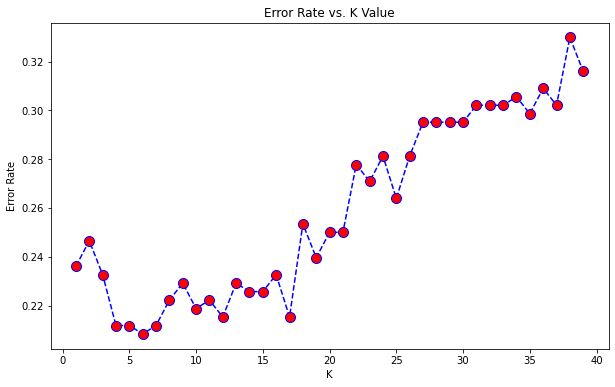

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)
# knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn.fit(X_scaled_train,y_train)
pred = knn.predict(X_scaled_test)

print('WITH K=5')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=5
[[131  16]
 [ 45  96]]
              precision    recall  f1-score   support

        CLRA       0.74      0.89      0.81       147
        KIRA       0.86      0.68      0.76       141

    accuracy                           0.79       288
   macro avg       0.80      0.79      0.79       288
weighted avg       0.80      0.79      0.79       288



In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)
# rfc_pred = rfc.predict(X_test)
rfc.fit(X_scaled_train, y_train)
rfc_pred = rfc.predict(X_scaled_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[121  26]
 [ 17 124]]
              precision    recall  f1-score   support

        CLRA       0.88      0.82      0.85       147
        KIRA       0.83      0.88      0.85       141

    accuracy                           0.85       288
   macro avg       0.85      0.85      0.85       288
weighted avg       0.85      0.85      0.85       288



In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear', 'poly', 'rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
# grid.fit(X_train,y_train)
grid.fit(X_scaled_train,y_train)

print(grid.best_params_)
print(grid.best_estimator_)

# grid_predictions = grid.predict(X_test)
grid_predictions = grid.predict(X_scaled_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)
[[106  41]
 [ 28 113]]
              precision    recall  f1-score   support

        CLRA       0.79      0.72      0.75       147
        KIRA       0.73      0.80      0.77       141

    accuracy                           0.76       288
   macro avg       0.76      0.76      0.76       288
weighted avg       0.76      0.76      0.76       288

